<a href="https://colab.research.google.com/github/aashrithresearch/Flowers/blob/main/flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from fastai.vision.all import *
from fastai.callback.fp16 import *
import torch
import os
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/flowers'
print(os.listdir(path))

['rose', 'dandelion', 'daisy', 'tulip', 'sunflower']


In [ ]:
flowers = DataBlock(blocks = (ImageBlock, CategoryBlock),
                    get_items=get_image_files,
                    get_y = parent_label,
                    splitter = RandomSplitter(seed=32),
                    item_tfms=Resize(400),
                    batch_tfms=aug_transforms(size=224, min_scale=0.5))
dls = flowers.dataloaders(path)

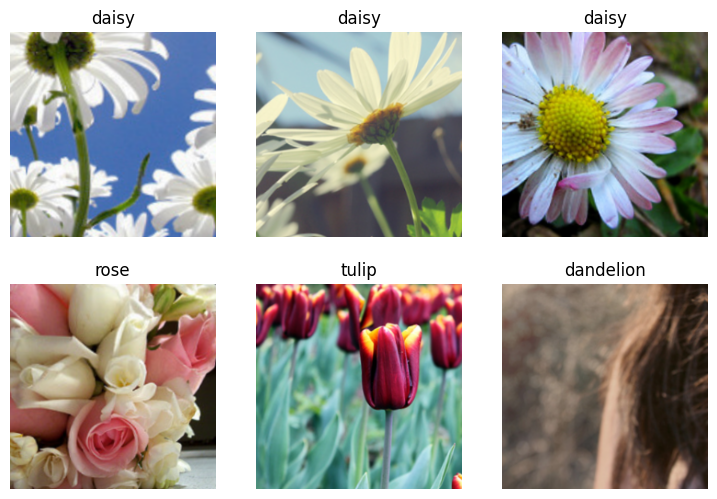

In [ ]:
dls.show_batch(nrows=2, ncols=3)

In [6]:
learn = vision_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(9, freeze_epochs=3)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 116MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,1.427496,0.472337,0.831034,07:40
1,0.790053,0.382719,0.878161,00:41
2,0.572728,0.348336,0.889655,00:39


epoch,train_loss,valid_loss,accuracy,time
0,0.361551,0.274303,0.916092,00:43
1,0.284232,0.255909,0.921839,00:45
2,0.232927,0.232728,0.933333,00:40
3,0.187552,0.251647,0.920690,00:43
4,0.131371,0.237948,0.935632,00:42
5,0.099820,0.214893,0.945977,00:41
6,0.066118,0.206706,0.950575,00:45
7,0.056228,0.197369,0.956322,00:42
8,0.043874,0.193023,0.956322,00:41


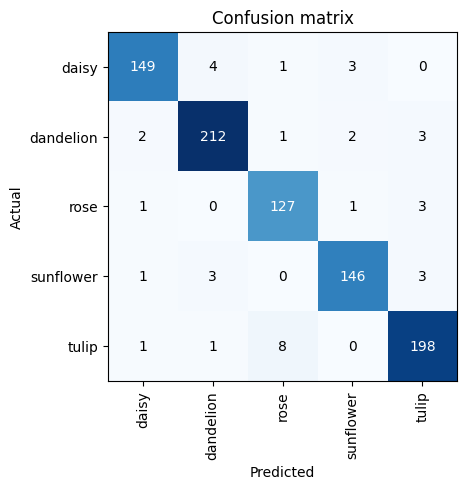

In [8]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()